In [8]:
import os
import numpy as np
import scipy
from collections import Counter
import sys
from IPython.display import SVG
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import matplotlib as ml
import re

In [9]:
%matplotlib inline
font = {'family' : 'Sans', 'weight' : 'normal','size': 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rc('font', family='serif',size=12)

# Functions

#### Plotting BadiRate Results

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


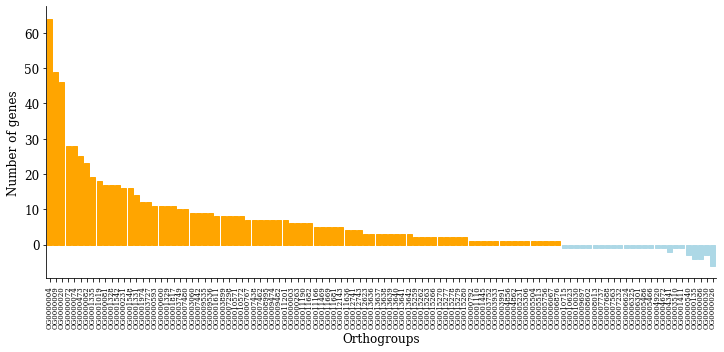

In [40]:
#Reading the file

#new = open("/Users/dshipilina/GitHub/GenomeVanessa/TopGO/BadiRate_summary.txt").read()
new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/TopGO/BadiRate_summary.txt").read()
split_ = new.split('\n')
#print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns =["orthogroup", "N_genes"]
df3 = df3[:-1]
#df3 = df3.apply(pd.to_numeric, errors='coerce')
df3["N_genes"] = pd.to_numeric(df3["N_genes"], downcast="float")
df3


#Setting up aspect ratio and axes

ml.rcParams['figure.figsize'] = (12.0, 5.0)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=7)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Orthogroups")
plt.ylabel("Number of genes")

#Creating barplot

#plt.bar(x,y) #,hue=df3["N_genes"],palette="cool")
graph= sns.barplot(df3["orthogroup"],df3["N_genes"], color="#faab36") #df3["N_genes"])


#Setting up differential transparency

#df3["alpha"] = np.where(df3['N_genes']<0, 1.0, 0.05)
#sns.barplot(x=df3["orthogroup"], y=df3["N_genes"],data=df3[df3["alpha"] == 0.05], color= "#faab36")
#sns.barplot(x=df3["orthogroup"], y=df3["N_genes"],data=df3[df3["alpha"] == 1.0], color= "grey")
#sns.barplot(x=df3["orthogroup"], y=df3["N_genes"],data=df3[df3["alpha"] == 1.0], alpha=1.0)
#ax = sens.barplot(x=idx, y=values) # or use ax=your_axis_object

for bar in graph.patches:
    if bar.get_height() < 0:
        bar.set_color('lightblue')    
    else:
        bar.set_color('orange')


plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=7)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Orthogroups")
plt.ylabel("Number of genes")
#Graph is created and stored in the variable 'graph'
#graph = sns.barplot(x="sepal_width",y="petal_width",data=dataset)

#Drawing a horizontal line at y=0
#graph.axhline(0,linewidth=1,color="grey") #,style="_")

#Saving the figure
plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/Figures/01_GOTerms/BadiRatestatsV2.pdf",bbox_inches="tight")
plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/Figures/01_GOTerms/BadiRatestatsV2.png",bbox_inches="tight")
plt.show()


#### Creating data frame for plotting window-based repeats

In [ ]:
def make_repeat_2_df(path):
    new = open(path).read()
    split_ = new.split('\n')
#print(split_[1])
    eigve_array=[]
#print(split_file2[2])
    for i in split_:
        #print(i)
        ii=re.split('\ |\t',i)
        #print(ii)
        eigve_array+=[ii]

    df4=pd.DataFrame(eigve_array[1:])
    #df4 = df4[:]
    df4.columns =["chrom", "begin", "end", "count_rpt", "length_rpt", "count_SINE","length_SINE", "count_DNA", "length_DNA", "count_TcM","length_TcM","count_LINE", "length_LINE", "count_LTR", "length_LTR", "count_nonLTR", "length_nonLTR"]
    #df4 = df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#df3 = df3.drop(labels=[171], axis=0)
#df3.columns=['chrom','begin','end','repts']
#df3 = df3.drop(labels=[171], axis=0)
#df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
#df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
    df4 = df4[:-1]
    df4 = df4[1:]
#df3['count_SINE'].fillna("0", inplace=True)
    df4.loc[df4["length_SINE"] == '','length_SINE'] = 0
    df4.loc[df4["length_TcM"] == '','length_TcM'] = 0
    df4 = df4.apply(pd.to_numeric, errors='coerce')
    df4['block_len']=df4["end"]-df4["begin"]
    df4['per_length']=df4["length_rpt"]/df4['block_len']*100
    df4['per_nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    df4['per_LTRadd']=df4["length_LTR"]/df4['block_len']*100
    df4['per_DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    df4['per_SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    df4['per_LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
    #df4['SINEsum']=df4["length_SINE"]+df4["DNAsum"]
    #df4['LINEsum']=df4["length_LINE"]+df4["SINEsum"]
    
    
    #sns.barplot(x=df["begin"], y=df["LINEsum"] , color="purple")
    #sns.barplot(x=df["begin"], y=df["SINEsum"] , color="red")
    #sns.barplot(x=df["begin"], y=df["DNAsum"] , color="green")
    #sns.barplot(x=df["begin"], y=df["length_LTR"] , color="orange")
    #sns.barplot(x=df["begin"], y=df["length_nonLTR"] , color="blue")
    
#df3.dtypes
    return df4

make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999929.1-repeat.out")

In [ ]:
def make_rep_df(path):
    new = open(path).read()
    split_ = new.split('\n')
#print(split_[1])
    eigve_array=[]
#print(split_file2[2])
    for i in split_:
    #print(i)
        ii=re.split('\ |\t',i)
    #print(ii)
        eigve_array+=[ii]

    df4=pd.DataFrame(eigve_array[1:])
    #df4 = df4[:]
    df4.columns =["chrom", "begin", "end", "count_rpt", "length_rpt", "count_SINE","length_SINE", "count_DNA", "length_DNA", "count_TcM","length_TcM","count_LINE", "length_LINE", "count_LTR", "length_LTR", "count_nonLTR", "length_nonLTR"]
    #df4 = df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#df3 = df3.drop(labels=[171], axis=0)
#df3.columns=['chrom','begin','end','repts']
#df3 = df3.drop(labels=[171], axis=0)
#df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
#df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
    df4 = df4[:-1]
    df4 = df4[1:]
#df3['count_SINE'].fillna("0", inplace=True)
    df4.loc[df4["length_SINE"] == '','length_SINE'] = 0
    df4.loc[df4["length_TcM"] == '','length_TcM'] = 0
    df4 = df4.apply(pd.to_numeric, errors='coerce')
    df4['block_len']=df4["end"]-df4["begin"]
    df4['per_length']=df4["length_rpt"]/df4['block_len']*100
    df4['per_nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    df4['per_LTRadd']=df4["length_LTR"]/df4['block_len']*100
    df4['per_DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    df4['per_SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    df4['per_LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
    #df4['SINEsum']=df4["length_SINE"]+df4["DNAsum"]
    #df4['LINEsum']=df4["length_LINE"]+df4["SINEsum"]
    
    
    #sns.barplot(x=df["begin"], y=df["LINEsum"] , color="purple")
    #sns.barplot(x=df["begin"], y=df["SINEsum"] , color="red")
    #sns.barplot(x=df["begin"], y=df["DNAsum"] , color="green")
    #sns.barplot(x=df["begin"], y=df["length_LTR"] , color="orange")
    #sns.barplot(x=df["begin"], y=df["length_nonLTR"] , color="blue")
    
#df3.dtypes
    return df4

#### Plot repeat stacked bars

In [ ]:
def plot_rep_stack_bar(df,mg_num,chrnum): 
    ml.rcParams['figure.figsize'] = (mg_num, 1.5)
    sns.barplot(x=df["begin"], y=df["per_length"] , color="lightgrey")
    plt.tick_params(axis='x', labelsize=1)
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = True
    plt.xlabel("Position along the chromosome")
    plt.ylabel("Number of repeats")
    #plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
    sns.barplot(x=df["begin"], y=df["per_LINEadd"] , color="purple")
    sns.barplot(x=df["begin"], y=df["per_SINEadd"] , color="red")
    sns.barplot(x=df["begin"], y=df["per_DNAtransadd"] , color="green")
    sns.barplot(x=df["begin"], y=df["per_LTRadd"] , color="orange")
    sns.barplot(x=df["begin"], y=df["per_nonLTR"] , color="blue")
    
    
    #df4['%nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    #df4['%LTRadd']=df4["length_LTR"]/df4['block_len']*100
    #df4['%DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    #df4['%SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    #df4['%LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
   

    plt.xlabel("Position along the chromosome (100kb windows)")
    
    #plt.xlabel(" ")
    plt.ylabel("% repeats")
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    x_axis = ax.axes.get_xaxis()
    x_axis.set_visible(False)
    ax.set_ylim([0,80])
    #ax.axes.yaxis.set_ticks([])
    #y_axis = ax.axes.get_yaxis()
    #y_axis.set_visible(False)
    #print("Blue LTR, orange non LTR")
    plt.savefig("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/repeat_"+chrnum+".pdf",bbox_inches="tight")
    plt.show()

#### Plotting window-based repeats

In [ ]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['chrom','begin','end','repts']
df3 = df3.drop(labels=[171], axis=0)
df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
df3

#df4= pd.concat([df3,df],axis=1)
#print(df4)
#df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
#df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
#df4.sort_values(by=["pop2"], inplace=True)
#df4 = df4.sort_values(["popID", "pop1","Location"], ascending = (False, True,True))
#print(df)
#df4 = df4.drop(labels=[347], axis=0)
#df4[100:150]

In [ ]:
def make_repeat_df(path):    
    new2 = open(path).read()
    split_ = new2.split('\n')
    #print(split_[2])
    eigve2_array=[]
    #print(split_file2[2])
    for i in split_:
        ii=i.split()
        eigve2_array+=[ii]

    df=pd.DataFrame(eigve2_array)
    df.columns=['chrom','begin','end','repts']
    #df = df.drop(labels=[138], axis=0)
    df["begin"] = pd.to_numeric(df["begin"], downcast="float")
    df["repts"] = pd.to_numeric(df["repts"], downcast="float")
    df = df[:-1]
    return df

In [ ]:
df25=make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999925.1-repeat.out")
df25

In [ ]:
import re
new = open("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999925.1-repeat.out").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=re.split('\ |\t',i)
    #print(ii)
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3 = df3.rename(columns=df3.iloc[0]).drop(df3.index[0])
#df3 = df3.drop(labels=[171], axis=0)
#df3.columns=['chrom','begin','end','repts']
#df3 = df3.drop(labels=[171], axis=0)
#df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
#df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
df3 = df3[:-1]
#df3['count_SINE'].fillna("0", inplace=True)
df3.loc[df3["length_SINE"] == '','length_SINE'] = 0
df3.loc[df3["length_TcM"] == '','length_TcM'] = 0
df3 = df3.apply(pd.to_numeric, errors='coerce')
df3['DNAsum']=df3["length_LTR"]+df3["length_DNA"]
df3['SINEsum']=df3["length_SINE"]+df3["DNAsum"]
df3['LINEsum']=df3["length_LINE"]+df3["SINEsum"]
#df3.dtypes
df3

In [ ]:
import re
new = open("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999924_repeat.out").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=re.split('\ |\t',i)
    #print(ii)
    eigve_array+=[ii]

df4=pd.DataFrame(eigve_array)
df4 = df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#df3 = df3.drop(labels=[171], axis=0)
#df3.columns=['chrom','begin','end','repts']
#df3 = df3.drop(labels=[171], axis=0)
#df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
#df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
df4 = df4[:-1]
#df3['count_SINE'].fillna("0", inplace=True)
df4.loc[df4["length_SINE"] == '','length_SINE'] = 0
df4.loc[df4["length_TcM"] == '','length_TcM'] = 0
df4 = df4.apply(pd.to_numeric, errors='coerce')
df4['DNAsum']=df4["length_LTR"]+df4["length_DNA"]
df4['SINEsum']=df4["length_SINE"]+df4["DNAsum"]
df4['LINEsum']=df4["length_LINE"]+df4["SINEsum"]
#df3.dtypes
df4

In [ ]:
#df3['DNAsum']=df3["length_LTR"]+df3["length_DNA"]
#df3['SINEsum']=df3["length_SINE"]+df3["DNAsum"]
df3['LINEsum']=df3["length_LINE"]+df3["SINEsum"]
df3

In [ ]:
#x = np.arange(0, 10, 0.01)
plt.subplot(2, 2, 1)
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999924_repeat.out"),16.4)
  
plt.subplot(2, 2, 2)
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999925.1-repeat.out"),16.4)

plt.subplot(2, 2, 3)
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999926.1-repeat.out"),16.4)

plt.subplot(2, 2, 4)
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999927.1-repeat.out"),16.4)

#plt.subplot(2, 2, 5)
#plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999928.1-repeat.out"),16.4)

'''
plt.subplot(5, 2, 6)
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999929.1-repeat.out"),16.4)

plt.subplot(5, 2, 7)
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999930.1-repeat.out"),16.4)

plt.subplot(5, 2, 8)
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999931.1-repeat.out"),16.4)

plt.subplot(5, 2, 9)
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999932.1-repeat.out"),16.4)

plt.subplot(5, 2, 10)
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999933.1-repeat.out"),16.4)
  
#plt.subplot(2, 2, 3)
#plt.plot(x, x)
  
#plt.subplot(2, 2, 4)
#plt.plot(x, 5-x)
  
plt.show()

'''

In [ ]:
#fig, axs = plt.subplots(2, 2)
#axs[0, 0]=plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999924_repeat.out"),16.4)
#axs[0, 0].set_title('Axis [0, 0]')
#axs[0, 1]=plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999925.1-repeat.out"),16.4)
#axs[0, 1].set_title('Axis [0, 1]')
#axs[1, 0]=plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999926.1-repeat.out"),16.4)
#axs[1, 0].set_title('Axis [1, 0]')
#axs[1, 1]=plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999927.1-repeat.out"),16.4)
#axs[1, 1].set_title('Axis [1, 1]')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1=plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999926.1-repeat.out"),16.4)
ax2=plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999926.1-repeat.out"),16.4)
#ax3=plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999926.1-repeat.out"),16.4)
#ax4=plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999926.1-repeat.out"),16.4)

In [ ]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999928.1-repeat.out")
plt.savefig("/Users/dshipilina/GitHub/LR999928.1-repeat.pdf",bbox_inches="tight")

In [ ]:
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999924_repeat.out"),17,"24")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999925.1-repeat.out"),16.6,"25")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999926.1-repeat.out"),16.3,"26")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999927.1-repeat.out"),16.1,"27")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999928.1-repeat.out"),16,"28")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999929.1-repeat.out"),15.9,"29")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999930.1-repeat.out"),15.7,"30")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999931.1-repeat.out"),15.5,"31")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999932.1-repeat.out"),15.4,"32")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999933.1-repeat.out"),14.9,"33")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999934.1-repeat.out"),14.8,"34")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999935.1-repeat.out"),14.8,"35")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999936.1-repeat.out"),14.6,"36")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999937.1-repeat.out"),13.9,"37")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999938.1-repeat.out"),13.8,"38")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999939.1-repeat.out"),13.7,"39")

In [ ]:
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999940.1-repeat.out"),13.8,"40")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999941.1-repeat.out"),13.7,"41")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999942.1-repeat.out"),13.5,"42")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999943.1-repeat.out"),13.2,"43")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999944.1-repeat.out"),12.9,"44")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999945.1-repeat.out"),12.8,"45")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999946.1-repeat.out"),12.6,"46")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999947.1-repeat.out"),11.7,"47")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999948.1-repeat.out"),11.3,"48")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999949.1-repeat.out"),11.2,"49")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999950.1-repeat.out"),9.9,"50")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999951.1-repeat.out"),9.8,"51")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999952.1-repeat.out"),8.2,"52")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999953.1-repeat.out"),8.2,"53")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999954.1-repeat.out"),7.4,"54")
plot_rep_stack_bar(make_rep_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999955.1-repeat.out"),6.2,"55")

In [ ]:
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999924_repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999925.1-repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999926.1-repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999927.1-repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999928.1-repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999929.1-repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999930.1-repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999931.1-repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999932.1-repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999933.1-repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999934.1-repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999935.1-repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999936.1-repeat.out"),16)
plot_repeats_stacked_bar(make_repeat_2_df("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/LR999937.1-repeat.out"),16)

In [ ]:
ml.rcParams['figure.figsize'] = (17, 3)
sns.barplot(x=df3["begin"], y=df3["length_rpt"] , color="lightgrey")
#plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=1)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Position along the chromosome")
plt.ylabel("Number of repeats")
#plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
sns.barplot(x=df3["begin"], y=df3["LINEsum"] , color="purple")
sns.barplot(x=df3["begin"], y=df3["SINEsum"] , color="red")
sns.barplot(x=df3["begin"], y=df3["DNAsum"] , color="green")
#sns.barplot(x=df3["begin"], y=df3["length_nonLTR"] , color="blue")
sns.barplot(x=df3["begin"], y=df3["length_LTR"] , color="orange")
sns.barplot(x=df3["begin"], y=df3["length_nonLTR"] , color="blue")

plt.xlabel("Position along the chromosome (100kb windows)")
plt.ylabel("Total repeat length")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])
print("Blue LTR, orange non LTR")
plt.show()

In [ ]:
df3.dtypes

#### Duplicated Genes Chromosome Total

In [ ]:
'''
import re
new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/Gained_genes_per_chrom.tsv").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=re.split('\ |\t',i)
    #print(ii)
    eigve_array+=[ii]
    
pd.read_csv('c:/~/trainSetRel3.txt', sep='\t')
'''

In [42]:
dfr=pd.read_csv("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/WindowBasedAnalysis/Gained_genes_per_chrom.tsv", sep='\t', header=0)
dfr.columns =["chrom", "duplic_genes"]
dfr

,chrom,duplic_genes
0,LR999924.1,10
1,LR999925.1,27
2,LR999926.1,23
3,LR999927.1,48
4,LR999928.1,14
5,LR999929.1,19
6,LR999930.1,15
7,LR999931.1,8
8,LR999932.1,16
9,LR999933.1,13


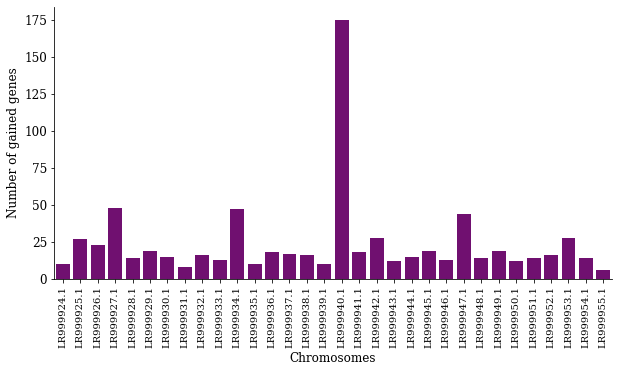

In [44]:
ml.rcParams['figure.figsize'] = (10, 5)
sns.barplot(x=dfr["chrom"], y=dfr["duplic_genes"] , color="purple")
plt.xticks(rotation=90)
plt.xlabel("Chromosomes")
plt.ylabel("Number of gained genes")
plt.tick_params(axis='x', labelsize=10)
#plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/WindowBasedAnalysis/gained_genes.pdf",bbox_inches="tight")
#plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/WindowBasedAnalysis/gained_genes.jpg",bbox_inches="tight")

#### Window-based gains plot

In [ ]:
dfr=pd.read_csv("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/LR999924.1_gains.tsv", sep="\t")
dfr.columns =["chrom", "begin", "end", "gained_genes"]
dfr

In [ ]:
import re
new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/LR999925.1_gains.tsv").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=i.split()
    #print(ii)
    eigve_array+=[ii]

dfr=pd.DataFrame(eigve_array)
#dfr = df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#df3 = df3.drop(labels=[171], axis=0)
dfr.columns=['chrom','begin','end','gains']
#df3 = df3.drop(labels=[171], axis=0)
#df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
#df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
#df4 = df4[:-1]
#df3['count_SINE'].fillna("0", inplace=True)
#df4.loc[df4["length_SINE"] == '','length_SINE'] = 0
#df4.loc[df4["length_TcM"] == '','length_TcM'] = 0
dfr = dfr.apply(pd.to_numeric, errors='coerce')
#df4['DNAsum']=df4["length_LTR"]+df4["length_DNA"]
#df4['SINEsum']=df4["length_SINE"]+df4["DNAsum"]
#df4['LINEsum']=df4["length_LINE"]+df4["SINEsum"]
#df3.dtypes
dfr

In [ ]:

    ml.rcParams['figure.figsize'] = (17, 1.5)
    sns.barplot(x=dfr["begin"], y=dfr["gains"] , color="grey")
    plt.tick_params(axis='x', labelsize=1)
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = True
    plt.xlabel("Position along the chromosome")
    plt.ylabel("N genes")
    #plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
    #sns.barplot(x=df["begin"], y=df["per_LINEadd"] , color="purple")
    #sns.barplot(x=df["begin"], y=df["per_SINEadd"] , color="red")
    #sns.barplot(x=df["begin"], y=df["per_DNAtransadd"] , color="green")
    #sns.barplot(x=df["begin"], y=df["per_LTRadd"] , color="orange")
    #sns.barplot(x=df["begin"], y=df["per_nonLTR"] , color="blue")
    
    
    #df4['%nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    #df4['%LTRadd']=df4["length_LTR"]/df4['block_len']*100
    #df4['%DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    #df4['%SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    #df4['%LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
   

    #plt.xlabel("Position along the chromosome (100kb windows)")
    
    #plt.xlabel(" ")
    #plt.ylabel("% repeats")
    ax = plt.gca()
    #ax.axes.xaxis.set_ticks([])
    #x_axis = ax.axes.get_xaxis()
    #x_axis.set_visible(False)
    ax.set_ylim([0,10])
    ax.invert_yaxis()
    #ax.axes.yaxis.set_ticks([])
    #y_axis = ax.axes.get_yaxis()
    #y_axis.set_visible(False)
    #print("Blue LTR, orange non LTR")
    plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/repeat_25.jpg",bbox_inches="tight")
    plt.show()

In [ ]:
new = open("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/LR999924.1_gains.tsv").read()
split_ = new.split('\n')
#print(split_[1])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    #print(i)
    ii=i.split()
    #print(ii)
    eigve_array+=[ii]

dfr=pd.DataFrame(eigve_array)
#dfr = df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#df3 = df3.drop(labels=[171], axis=0)
dfr.columns=['chrom','begin','end','gains']
#df3 = df3.drop(labels=[171], axis=0)
#df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
#df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
#df4 = df4[:-1]
#df3['count_SINE'].fillna("0", inplace=True)
#df4.loc[df4["length_SINE"] == '','length_SINE'] = 0
#df4.loc[df4["length_TcM"] == '','length_TcM'] = 0
dfr = dfr.apply(pd.to_numeric, errors='coerce')
#df4['DNAsum']=df4["length_LTR"]+df4["length_DNA"]
#df4['SINEsum']=df4["length_SINE"]+df4["DNAsum"]
#df4['LINEsum']=df4["length_LINE"]+df4["SINEsum"]
#df3.dtypes
dfr

In [ ]:
ml.rcParams['figure.figsize'] = (17, 1.5)
    sns.barplot(x=dfr["begin"], y=dfr["gains"] , color="lightgrey")
    plt.tick_params(axis='x', labelsize=1)
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = True
    plt.xlabel("Position along the chromosome")
    plt.ylabel("N genes")
    #plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
    #sns.barplot(x=df["begin"], y=df["per_LINEadd"] , color="purple")
    #sns.barplot(x=df["begin"], y=df["per_SINEadd"] , color="red")
    #sns.barplot(x=df["begin"], y=df["per_DNAtransadd"] , color="green")
    #sns.barplot(x=df["begin"], y=df["per_LTRadd"] , color="orange")
    #sns.barplot(x=df["begin"], y=df["per_nonLTR"] , color="blue")
    
    
    #df4['%nonLTR']=df4["length_nonLTR"]/df4['block_len']*100
    #df4['%LTRadd']=df4["length_LTR"]/df4['block_len']*100
    #df4['%DNAtransadd']=(df4["length_LTR"]+df4["length_DNA"])/df4['block_len']*100
    #df4['%SINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"])/df4['block_len']*100
    #df4['%LINEadd']=(df4["length_LTR"]+df4["length_DNA"]+df4["length_SINE"]+df4["length_LINE"])/df4['block_len']*100
   

    plt.xlabel("Position along the chromosome (100kb windows)")
    
    #plt.xlabel(" ")
    #plt.ylabel("% repeats")
    ax = plt.gca()
    #ax.axes.xaxis.set_ticks([])
    #x_axis = ax.axes.get_xaxis()
    #x_axis.set_visible(False)
    ax.set_ylim([0,10])
    #ax.axes.yaxis.set_ticks([])
    #y_axis = ax.axes.get_yaxis()
    #y_axis.set_visible(False)
    #print("Blue LTR, orange non LTR")
    #plt.savefig("/Users/dshipilina/GitHub/GenomeVanessa/VanessaRepeat/repeat_"+chrnum+".pdf",bbox_inches="tight")
    plt.show()

In [ ]:
ml.rcParams['figure.figsize'] = (10, 5)
sns.barplot(x=dfr["chrom"], y=dfr["duplic_genes"] , color="purple")
plt.xticks(rotation=90)
plt.xlabel("Chromosomes")
plt.ylabel("Number of gained genes")
plt.tick_params(axis='x', labelsize=10)
plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/gained_genes.pdf",bbox_inches="tight")
plt.savefig("/Users/dariashipilina/Documents/GitHub/GenomeVanessa/VanessaAnnotation/gained_genes.jpg",bbox_inches="tight")

## Orthogroup evolution

In [1]:
chrom = ['LR999924.1', 'LR999925.1', 'LR999925.1']

In [21]:
#OG0000231
OG1=(1,0,0)
#OG0005756
OG2=[2,0,1]
#OG0000473
OG3=[1,2,2]
#OG0000072
OG4=[1,2,5]

# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(OG1,OG2,OG3,OG4)),
               columns =['OG0000231','OG0005756','OG0000473','OG0000072'])
df['OG0000231']

0    1
1    0
2    0
Name: OG0000231, dtype: int64

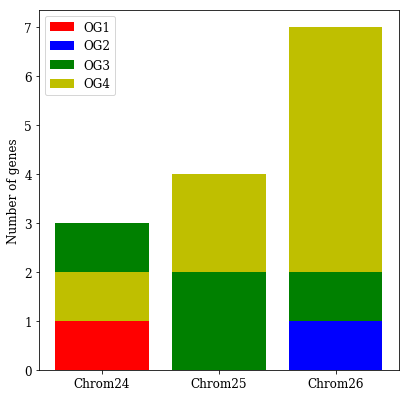

In [36]:
#N = 3
#menMeans = (20, 35, 30, 35, 27)
#womenMeans = (25, 32, 34, 20, 25)
#ind = np.arange(3) # the x locations for the groups
labels = ['Chrom24', 'Chrom25', 'Chrom26']
#OG0000231
#OG1=[1,0,0]

width = 0.8
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, OG1, width, color='r')
ax.bar(labels, OG2, width,bottom=df['OG0000231'], color='b', orientation=u'vertical')
ax.bar(labels, OG3, width,bottom=df['OG0005756'], color='g')
ax.bar(labels, OG4, width,bottom=df['OG0000473'], color='y')
ax.set_ylabel('Number of genes')#orientation=u'vertical'
#ax.set_title('Scores by group and gender')
#ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['OG1', 'OG2', 'OG3', 'OG4'])
plt.show()

In [1]:
import plotly.express as px

wide_df = px.data.medals_wide()

fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], title="Wide-Form Input")
fig.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()

In [4]:
import plotly.express as px
df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()

In [5]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.write_html('first_figure.html', auto_open=True)

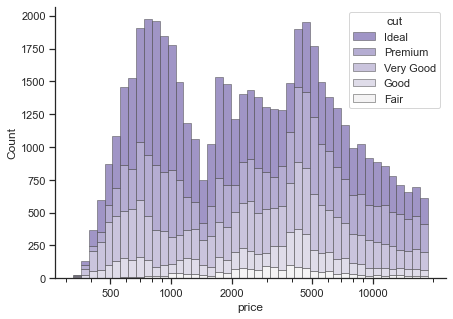

In [13]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

#### Development

In [ ]:
cols = df3.columns.drop(df3['chrom'])
cols
df3 = df3.apply(pd.to_numeric, errors='coerce')

df3.dtypes

In [ ]:
path3="/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out"

In [ ]:
df=make_repeat_df("/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out")
df3=make_repeat_df("/Users/dshipilina/GitHub/AfricanDivide/ChromLR40.repeat.out")

In [ ]:
ml.rcParams['figure.figsize'] = (13, 1.5)
sns.barplot(x=df3["begin"], y=df3["repts"] , color="lightgrey")
#plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=0)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Position along the Z chromosome LR999924")
plt.ylabel("Number of repeats")
#plt.savefig("/Users/dshipilina/GitHub/repeat_24.png",bbox_inches="tight")
plt.show()

ml.rcParams['figure.figsize'] = (17, 1.5)
sns.barplot(x=df["begin"], y=df["repts"] , color="lightgrey")
#plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=1)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Position along the W chromosome LR999940")
plt.ylabel("Number of repeats")
#plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
plt.show()

#"#faab36", "#249ea0"

In [ ]:
ml.rcParams['figure.figsize'] = (17, 1.5)
sns.barplot(x=df["begin"], y=df["repts"] , color="lightgrey")
#plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=1)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Position along the W chromosome LR999940")
plt.ylabel("Number of repeats")
#plt.savefig("/Users/dshipilina/GitHub/repeat_40.png",bbox_inches="tight")
plt.show()

In [ ]:
def make_repeat_df(path):    
    new2 = open("/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out").read()
    split_ = new2.split('\n')
    #print(split_[2])
    eigve2_array=[]
    #print(split_file2[2])
    for i in split_:
        ii=i.split()
        eigve2_array+=[ii]

    df=pd.DataFrame(eigve2_array)
    df.columns=['chrom','begin','end','repts']
    #df = df.drop(labels=[138], axis=0)
    df["begin"] = pd.to_numeric(df["begin"], downcast="float")
    df["repts"] = pd.to_numeric(df["repts"], downcast="float")
    df = df[:-1]
    return df

In [ ]:
def plot_repeats(df,mg_num): 
    ml.rcParams['figure.figsize'] = (mg_num, 1.5)
    sns.barplot(x=df["begin"], y=df["repts"] , color="lightgrey")
    #plt.xticks(rotation=90)
    plt.tick_params(axis='x', labelsize=1)
    #plt.xticks(" ")
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = True
    #plt.xaxis.label.set_visible(False)
    plt.xlabel('') #"Position along the Z chromosome LR999924")
    plt.ylabel("Number of repeats")
    #plt.savefig("/Users/dshipilina/GitHub/repeat_24.png",bbox_inches="tight")
    plt.show()

In [ ]:
plot_repeats(df3,13.8)
plot_repeats(df,17)

# PCA


In [ ]:
dfx

## Dataset 1: Variants w/o singletons and doubletons 

First, PCA analysis was preformed for the data with only necessary filtering to retain maximum coverage.
Short summary of filtering:
- Input file from Aurora: `cardui_migrdiv_indv.vcf.gz`
- Maximum missing % of individuals: 0.3
- Minor allele frequency cutoff fixed to 0.006: which correspond to removing singletons only in dataset of 347 individuals 
- Variant depth set to maximum possible: 4 (see justification in Evernote)


### Creating data frames

In [ ]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

### Plotting

In [11]:
#print(df['loc'])
eigval = open("/Users/dariashipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenval").read()
#eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
plt.show()


df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
data=df[df["alpha"] == 1]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
plt.show()

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
#plt.show()





#df

#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)

#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dariashipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenval'

## Dataset 1: Variants w/o singletons and doubletons, no LD

We observe distinct outliers in Southern Hemisphere, all belonging to Namibia sampling site. Such pattern, along with excessive grouping of other populations may be an effect of LD in the sample. Here we attempt to correct for LD, removing SNPs, where r^2>0.2 on 50Kb overlapping blocks (performed in plink).

### Creating data frames

In [ ]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.fullSFS.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

### Plotting

In [ ]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.fullSFS.noLD.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


cardui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(cardui)
sns.palplot(sns.color_palette())
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/color_scheme.png",bbox_inches="tight")
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40,alpha=.8) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=0, trim=False)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noLD.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noLD.png",bbox_inches="tight")
plt.show()

df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
data=df[df["alpha"] == 1]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#sns.despine(offset=0, trim=True)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noNHE.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noNHE.png",bbox_inches="tight")
plt.show()

#df["alpha"] = np.where(dfnor, 0, 1)
data=df.loc[(df["popID"] == "SH") | (df["popID"] == "SHEA")]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'], palette="YlOrBr",alpha=.7,s=40)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
plt.show()
data=df.loc[(df["popID"] == "SH") | (df["popID"] == "SHEA")]
sns.scatterplot(x=data['PCA2'], y=data['PCA3'], hue=data['popID'], palette="YlOrBr",alpha=.7,s=40)
plt.ylabel("PCA 3 ("+ (split_eigval[2])+"%)")
plt.xlabel("PCA 2 ("+split_eigval[1]+"%)")
#sns.scatterplot(x=north['PCA1'], y=north['PCA2'], hue=north['popID'])
#north

In [ ]:
#fig_dims = (6, 6)
ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'], palette="YlOrBr",alpha=.8,s=60, ax=axs[0])
sns.scatterplot(x=data2['PCA2'], y=data2['PCA3'], hue=data2['popID'], palette="YlOrBr",alpha=.8,s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthPC123.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthPC123.png",bbox_inches="tight")

In [ ]:
#fig_dims = (6, 6)
#sns.set_palette("muted")
 
ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Location'],palette="tab10",s=60, ax=axs[0])
sns.scatterplot(x=data2['PCA2'], y=data2['PCA3'], hue=data2['Location'], palette="tab10",s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthLocs.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthLocs.png",bbox_inches="tight")

In [ ]:
#fig_dims = (6, 6)
data_north=df.loc[(df["popID"] == "NHE") | (df["popID"] == "NHEA")]

ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['popID'], palette="YlOrBr",alpha=.8,s=60, ax=axs[0])
sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['popID'], palette="YlOrBr",alpha=.8,s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_North.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_North.png",bbox_inches="tight") 
plt.show()
    
ml.rcParams['figure.figsize'] = (9.0, 9.0)
#fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
         # ncol=5, mode="expand", borderaxespad=0.4)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['Location'],palette="cubehelix",s=30)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=5, mode="expand", borderaxespad=0.4)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['Location'], palette="tab10",s=60,ax=axs[1])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthLocs.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthLocs.png",bbox_inches="tight")

In [ ]:
#data3=df.loc[(df["popID"] == "NHE") | (df["popID"] == "NHEA")]
df.loc[df["PCA2"] >= 0.2]
#174 158 249
df.loc[df["PCA2"] <= -0.15]

In [ ]:
data = df.drop(labels=[174,158,249], axis=0)
data_north=data.loc[(data["popID"] == "NHE")]
data_north

ml.rcParams['figure.figsize'] = (9.0, 9.0)
#fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
         # ncol=5, mode="expand", borderaxespad=0.4)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['Location'],palette="icefire",s=40)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=5, mode="expand", borderaxespad=0.4)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['Location'], palette="tab10",s=60,ax=axs[1])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthEzoom.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthEzoom.png",bbox_inches="tight")

## Dataset 2: Rare variants, no LD (Aurora)

Here we briefly check population structure based on rare variants (MAF: 0.001-0.010, MAC: 1-4)

### Creating data frames

In [ ]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenvec").read()
#eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)


### Plotting

In [ ]:
flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_all.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_all.png",bbox_inches="tight")
plt.show()

In [ ]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
#dftmp2 =dftmp2.drop(dftmp2.columns[0], axis=1)
#dftmp2["hem"] = dftmp2['popID'] 
#dftmp2=dftmp2["hem"].str.split('H',expand=True)
#dftmp2 =dftmp2.drop(dftmp2.columns[1], axis=1)
#dftmp2.columns=["hem"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
#remove outliers
#df = df.drop(labels=[347,241,148], axis=0)
df[0:50]

In [ ]:
#print(df['loc'])
#df = df.drop(labels=[241,148], axis=0)
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[2])

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'])#,palette="dark")
#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
#plt.legend(loc='center left') #mode="expand") #loc='center left', bbox_to_anchor=(1, 0.5),
           #ncol=2, mode="expand", borderaxespad=0.4)
plt.legend(loc='lower left')#, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(bbox_to_anchor=(0., 1.0, 1., .102), loc='lower left') #,
          #ncol=2, mode="expand", borderaxespad=0.4)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
#plt.legend([])
#plt.legend('',frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_outlremoved.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

In [ ]:
#Check outliers

#df['PCA1'].max()
print(df['PCA1'].idxmin(axis = 0))
print(df['PCA2'].idxmin(axis = 0))

## Dataset 3

In [ ]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.noMAF.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

In [ ]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.noMAF.noLD.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


cardui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(cardui)
#sns.palplot(sns.color_palette())
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/color_scheme.png",bbox_inches="tight")
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], color='grey')
sns.scatterplot(xout, yout, color='orange', s=80)#, hue=df['popID'], s=20,alpha=.8) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=0, trim=False)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (9.0, 9.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
#plt.text(df['PCA1'],df['PCA2'],"TOT", color='red')
plt.text(xout,yout,"15D327",size=16)#, color='red')
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_noMAF_noLD.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_noMAF_noLD.png",bbox_inches="tight")
plt.show()

In [ ]:
#dot labler
xout=df['PCA1'][df["FullID"]=='Namibia_15D327']
yout=df['PCA2'][df["FullID"]=='Namibia_15D327']

# ADMIXTURE

In [1]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ADMIXTURE/cardui_migrdiv_indv_rarev_md25.2.Q").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['pop1','pop2']
df3

df4= pd.concat([df3,df],axis=1)
#print(df4)
df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
#df4.sort_values(by=["pop2"], inplace=True)
df4 = df4.sort_values(["popID", "pop1","Location"], ascending = (False, True,True))
#print(df)
df4 = df4.drop(labels=[347], axis=0)
df4[100:150]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dshipilina/GitHub/AfricanDivide/ADMIXTURE/cardui_migrdiv_indv_rarev_md25.2.Q'

In [ ]:
ml.rcParams['figure.figsize'] = (32, 5)
#index = range(len(df4["FullID"]))
plt.bar(df4["FullID"],height=1)#,width=0.98)
#plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
#index = range(len(df4["FullID"]))
#plt.xticks(index, df4["FullID"])  # set the X ticks and labels
#sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
sns.barplot(x=df4["FullID"], y=df4["pop1"], color='lightblue')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=7)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("SHEA  SH   NHEA  NHE")
plt.ylabel("inferred allele frequences")

# show the graph
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_v4.pdf",bbox_inches="tight")
#plt.show

In [ ]:
sns.barplot(x=df3[""], y=df4["pop1"], color='lightblue')

In [ ]:
# new = open("/Users/dshipilina/GitHub/AfricanDivide/cardui_migrdiv_indv_rarev_md25.2.Q").read()
# split_ = new.split('\n')
# print(split_[2])
# eigve_array=[]
# #print(split_file2[2])
# for i in split_:
#     ii=i.split()
#     eigve_array+=[ii]

# df3=pd.DataFrame(eigve_array)
# df3.columns=['pop1','pop2']
# df3

# df4= pd.concat([df3,df],axis=1)
# #print(df4)
# #df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
# df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
# #df4.sort_values(by=["pop2"], inplace=True)
# df4.sort_values(["pop", "popID"])#, ascending = (False, True))
# #print(df)
# #df4 = df4.drop(labels=[347], axis=0)
# df4[167:190]

In [ ]:
# ml.rcParams['figure.figsize'] = (30, 5)
# #index = range(len(df4["FullID"]))
# plt.bar(df5["FullID"],height=1)#,width=0.98)
# #plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
# #index = range(len(df4["FullID"]))
# #plt.xticks(index, df4["FullID"])  # set the X ticks and labels
# #sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
# sns.barplot(x=df5["FullID"], y=df5["pop1"], color='lightblue')
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', labelsize=8)
# plt.rcParams['axes.spines.left'] = False
# #plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False
# #plt.rcParams['axes.spines.bottom'] = False
# plt.xlabel("")
# plt.ylabel("inferred allele frequences")
# index = range(len(df5["FullID"]))
# plt.xticks(index, df5["FullID"])

# # show the graph
# plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_v5.pdf",bbox_inches="tight")
# plt.show

In [ ]:
# new = open("/Users/dshipilina/GitHub/AfricanDivide/cardui_migrdiv_indv_rarev_md25.2.Q").read()
# split_ = new.split('\n')
# print(split_[2])
# eigve_array=[]
# #print(split_file2[2])
# for i in split_:
#     ii=i.split()
#     eigve_array+=[ii]

# df3=pd.DataFrame(eigve_array)
# df3.columns=['pop1','pop2']
# df3

# df4= pd.concat([df3,df],axis=1)
# print(df4)
# df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
# df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
# df4.sort_values(by=["pop2"], inplace=True)
# print(df4)
# #sns.axes_style("whitegrid")
# ml.rcParams['figure.figsize'] = (30, 5)
# plt.bar(df4["FullID"],height=1)#,width=0.98)
# plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
# index = range(len(df4["FullID"]))
# plt.xticks(index, df4["FullID"])  # set the X ticks and labels
# #bar1 = sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
# #bar2 = sns.barplot(x=df4["FullID"], y=df4["pop1"], color='lightblue',edgecolor="none")
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', labelsize=6)
# #plt.rcParams['axes.spines.left'] = False
# plt.rcParams['axes.spines.right'] = False
# #plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.spines.bottom'] = False

# #plt.show()  

# #plt.bar(df4["FullID"],height=1)

# #print(df4["pop1"])
# #tips = sns.load_dataset("tips")
# #tips
                         

# # bar chart 2 -> bottom bars (group of 'smoker=Yes')
# #bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# # add legend
# #top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
# #bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
# #plt.legend(handles=[top_bar, bottom_bar])

# # show the graph
# #plt.show()
# plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_3.pdf",bbox_inches="tight")